In [37]:
pip install surprise

     |████████████████████████████████| 11.8 MB 243 kB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-linux_x86_64.whl size=2325836 sha256=674bf342e5f7706f0afa9d245272274ca8bc5f7e391af35602adc9e67069db58
  Stored in directory: /home/completeshoppe/.cache/pip/wheels/20/91/57/2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import int64

import matplotlib.pyplot as plt
import surprise
from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate


import requests
import IPython.display as Disp
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [8]:
songs_data = pd.read_csv('song_data.csv')
counts_data = pd.read_csv('count_data.csv')
import sklearn

In [11]:
songs_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [9]:
songs_data.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [13]:
#Check which artist has the most songs in the dataset.
songs_data.groupby("artist_name")["song_id"].count().sort_values(ascending=False)

artist_name
Michael Jackson                            194
Johnny Cash                                193
Beastie Boys                               187
Joan Baez                                  181
Neil Diamond                               176
                                          ... 
Greg Davis & Jeph Jerman                     1
Greg Davis_ Sébastien Roux                   1
Greg Edwards                                 1
Greg Hawks & The Tremblers                   1

Little Louie" Vega Feat. Arnold Jarvis      1
Name: song_id, Length: 72665, dtype: int64

In [12]:
counts_data.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [10]:
counts_data.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [16]:
#Find which user is most active in our dataset
counts_data.groupby('user_id')['play_count'].count().sort_values(ascending=False)

user_id
6d625c6557df84b60d90426c0116138b617b9449    711
fbee1c8ce1a346fa07d2ef648cec81117438b91f    643
4e11f45d732f4861772b2906f81a7d384552ad12    556
24b98f8ab023f6e7a1c37c7729c623f7b821eb95    540
1aa4fd215aadb160965110ed8a829745cde319eb    533
                                           ... 
f19b6e160a2c88805c66aa5068001a96f22ef228      1
eb0a706547d7e173757a83358def009af40fd74f      1
b506264c38f0739cb352605ce534e7d03d016553      1
cd4a00b93a113ededaab455e3a62118ab11b5c47      1
d33330810b25dd593e6645e4a6ad791bc2f05685      1
Name: play_count, Length: 76353, dtype: int64

In [20]:
#Combining Datasets
df = pd.merge(song_data, count_data, on= 'song_id')
df.head(10)

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count
0,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,334,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
1,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,1537,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
2,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2206,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
3,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,23688,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1
4,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,28969,2bcef2a30bd8913405971761a0e6c292d771c086,1
5,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,33353,97108314fbfe395b2897fa0b403df8e7e818842c,1
6,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,38993,eb42f1ba4e42596e70512a61c414ff84f50301b7,1
7,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,119353,535ed77c299c240a81a82bc3edaae35e062c52fa,1
8,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,125820,9a2f37bb6e8d3c76669e989bf46d869875f93a05,1
9,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,137977,e0dc9c4ddf5dfd341ab21610ca4563e88e901988,1


In [21]:
#Inspecting DataFrame tail
df.tail(10)

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count
2086936,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1714483,9253b3af09092f742e6d1ef5a45a612c6f14c0a0,1
2086937,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1735926,e9aa87f6f836e93146ff2928ac69989863de12d7,1
2086938,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1814095,c68f70d54803235513e5f2c46d5325f88df80486,1
2086939,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1837873,806918e1d9a800ebbb849c67c63645846e5e89b0,1
2086940,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1886042,3150131ed403aac123e68ceec0a8a71df90c7dc1,1
2086941,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1916154,37781fff15682ccd92aface63f66d3f525e2f88f,1
2086942,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1950844,49e66adb87d5d39781add88c202aa9802010e848,3
2086943,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1956373,9d659bb73b93384297f240a4adadccf4d81bd681,1
2086944,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1986093,c65a346ab8f41fb56926b503ece810f358b0d241,1
2086945,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,1996090,84e72d86fab784be544a8e2fe2826c73530165fd,1


In [22]:
df.columns.values

array(['song_id', 'title', 'release', 'artist_name', 'year', 'Unnamed: 0',
       'user_id', 'play_count'], dtype=object)

In [23]:
#Let's drop the "Unnamed 0" column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
df.shape

(2086946, 7)

In [29]:
df.play_count.describe()

count    2.086946e+06
mean     3.031582e+00
std      6.550493e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.213000e+03
Name: play_count, dtype: float64

In [27]:
df.year.max()

2010

In [68]:
#Checking for the most popular songs and their respective playcounts.
most_played = df.groupby(['song_id','title'])['play_count'].count().sort_values(ascending=False)
most_played.head(25)

song_id             title                                                              
SOFRQTD12A81C233C0  Sehr kosmisch                                                          8277
SOWCKVR12A8C142411  Use Somebody                                                           7952
SOAUWYT12A81C206F1  Undo                                                                   7032
SOAXGDH12A8C13F8A1  Dog Days Are Over (Radio Edit)                                         6949
SOBONKR12A58A7A7E0  You're The One                                                         6412
SOSXLTC12AF72A7F54  Revelry                                                                6145
SONYKOW12AB01849C9  Secrets                                                                5841
SOPXKYD12A6D4FA876  Yellow                                                                 5658
SODGVGW12AC9075A8D  Somebody To Love                                                       5546
SOEGIYH12A6D4FC0E3  Horn Concerto No. 4 in E fla

In [32]:
#Checking which artist is the most popular
df.groupby('artist_name')['play_count'].count().sort_values(ascending=False)

artist_name
Coldplay            32572
Kings Of Leon       26169
The Black Keys      19862
Jack Johnson        19590
Muse                19282
                    ...  
Shotta                 54
Umphrey's McGee        52
Ricardo Montaner       52
The Four Seasons       52
Amparanoia             50
Name: play_count, Length: 3379, dtype: int64

## Check for missing data


In [33]:
df.isna().sum()

song_id        0
title          0
release        0
artist_name    0
year           0
user_id        0
play_count     0
dtype: int64

## EDA - Exploratory data analysis

## Missing Song Year Data - Titles
Some songs are missing the year that the song was released. These values have been replaced with a 0. Furthermore, some of the song titles have weird names, because we are not sure about these items, we will leave them as is in the data.

### Number of songs and users

In [34]:
n_users = df.user_id.nunique()
n_songs = df.song_id.nunique()
print(n_users)
print(n_songs)

76353
10000


In [35]:
df.play_count.nunique()

295

### Play count distribution

<AxesSubplot:>

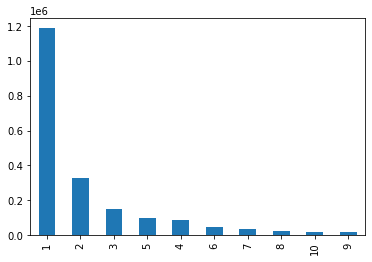

In [36]:
df['play_count'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:>

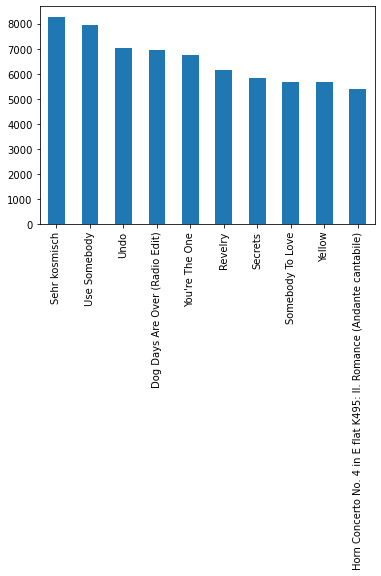

In [82]:
df['title'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:>

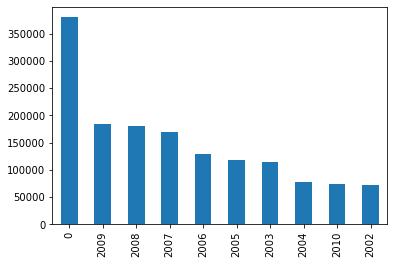

In [79]:
df['year'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

## Observations
Distribution of play count is not normally distributed. Our data has most songs released in years 2006-2009. This can be assumed to be as a result of more users having access to play these records digitally due to increase poliferation of access to technology. The majority of our songs were played on average 3 or less times, therefore our data will be sparse therefore we should filter our dataset based on a min number of plays to have a more robust data to analyze. 

## Proposed Approaches

### Popularity based model(not shown)
For this approach, we will just utilize the play count as ratings and simply recommend the most played songs

### Nearest Neighbor
This approach is more involved and directly applies to the problem statement mentioned previously. This approach measures the similarity between users and items which in this case are songs. For the item -based model, there is an assumption that song similarity can be clustered and associated with users who also share a set of similarities. Therefore, similiar users, based on features can be recommended similiar songs, also based on features.

### Single Value Decomposition (SVD)
Because features can grow tremendously and complicate already complex algorithms, we utilize SVD which can be employed to reduce the number of deatures of a dataset. However, this dataset presents a manageable amount of features. 

### Transforming the dataset (Option - not used here)
As mentioned above, this dataset does not contain explocit ratings so we will attempt to utilize the number of times played as a proxy for rating. We have already filtered out plays of less than 3 and we believe that plays of less than 3 do not represent a strong enough track-record(excuse the pun) for potential recommendation. 

Above we have calculated that the maximum play count is 2213, we will adjust this on a scale of 0 - 5 and assign the ratings accordinly.

### Create Pivot Table of User Vs. Songs

In [39]:
#Dataset to assign each user to play count for each song
ct_df = df.pivot_table(values='play_count', index='user_id', columns='title', fill_value=0)

In [40]:
ct_df.head()

title,#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version),#40,& Down,' Cello Song,'97 Bonnie & Clyde,'Round Midnight,'Til We Die (Album Version),'Till I Collapse,('Til) I Kissed You,(Anaesthesia) Pulling Teath,...,sillyworld (Album Version),sleep_ eat food_ have visions,smile around the face,sun drums and soil,teachme (Album Version),the Love Song,you were there with me,¡Viva La Gloria! (Album Version),¿Lo Ves? [Piano Y Voz],Época
user_id,,,,,,,,,,,,,,,,,,,,,
00003a4459f33b92906be11abe0e93efc423c0ff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00005c6177188f12fb5e2e82cdbd93e8a3f35e64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00030033e3a2f904a48ec1dd53019c9969b6ef1f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0007235c769e610e3d339a17818a5708e41008d9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transpose the table before we apply SVD

In [41]:
X = ct_df.values.T
X.shape

(9593, 76353)

In [47]:
#User Id's are columns here and song ID's are rows
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Latent vectors after compressing with SVD - Genre's
#We then normalize the values and assign to each user
#pearson Correlation techniques.
#SVD Reduces dimensions to simplify feature engineering
#Redcues Storage Cost
#SVD decomposes one metric into multiple matrices for dimensionality reduction and reduction in storage cost
# U = User to concept
# E = COncept
# V^T = Concepts to music

## Dataset with applied SVD

In [48]:
SVD = TruncatedSVD(n_components=20, random_state =17)
result_matrix = SVD.fit_transform(X)
result_matrix.shape

(9593, 20)

#### Create Pearson coorelation matrix

In [49]:
# This will create a matrix of songs in correlation to all the other songs.
corr_mat = np.corrcoef(result_matrix)
corr_mat.shape

(9593, 9593)

In [50]:
#Copy song names into a list
song_names = ct_df.columns
song_list = list(song_names)
print(song_list)

['#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version)', '#40', '& Down', "' Cello Song", "'97 Bonnie & Clyde", "'Round Midnight", "'Til We Die (Album Version)", "'Till I Collapse", "('Til) I Kissed You", '(Anaesthesia) Pulling Teath', '(Antichrist Television Blues)', '(I Can\x19t Get No) Satisfaction', "(I Can't Get Me No) Satisfaction", '(I Got That) Boom Boom', '(I Just) Died In Your Arms', "(I've Had) The Time Of My Life", "(If You're Wondering If I Want You To) I Want You To", '(Keep Feeling) Fascination (2003 Digital Remaster)', '(Nice Dream)', "(Nothing's Too Good) For My Baby (1999 Digital Remaster)", '(Oh) Pretty Woman (Remastered Album Version)', '(Remember The Days Of The) Old Schoolyard', "(Sittin' On) The Dock Of The Bay", '(Splash) Turn Twist', "(The Symphony Of) Blase'", '(They Long To Be) Close To You', '(You Drive Me) Crazy (The Stop Remix!)', '(iii)', '...Baby One More Time', '..Come Around', '0010', '1.36', '10 A.M. Automatic', '10 Miles Wide', '100°', '10:

In [69]:
#Simulate that the user is listening to a song they selected.
query_index = song_list.index('Waiting For Tonight')
print(query_index)

8897


In [70]:
corr_similar_songs = corr_mat[query_index]
corr_similar_songs.shape
print(corr_similar_songs)
print(type(song_list))
print((corr_similar_songs<1.0) & (corr_similar_songs >0.9))


[0.55471253 0.82742293 0.68195988 ... 0.91601099 0.84956539 0.89152623]
<class 'list'>
[False False False ...  True False False]


In [73]:
#Print out actual songs similar to the current song to recommend to user.
list(song_names[(corr_similar_songs<1.0) & (corr_similar_songs > 0.95)])

['(Remember The Days Of The) Old Schoolyard',
 '...Baby One More Time',
 'A Ti',
 'Abrazame  (Version Acustica)',
 'Advertising Space',
 "Ain't Nobody",
 'Alejate De Mi',
 'Alguien Soy Yo',
 'All Star',
 'Amame',
 'American Idiot [feat. Green Day & The Cast Of American Idiot] (Album Version)',
 'Andar Conmigo',
 'Animal Instinct',
 'Back To Me',
 'Because You Loved Me',
 'Bitter Sweet Symphony',
 'Bleeding Love',
 'Breakout',
 'Bulizás',
 'Bullet Proof',
 'Bust A Move',
 'Cherish',
 'Clocks',
 'Colgando en tus manos (con Marta Sanchez)',
 'Come On Over (All I Want Is You)',
 'Corazon Espinado',
 'Damn Girl',
 'Dishes',
 'Do You Really Want To Hurt Me',
 "Don't Cha",
 "Don't Go Breaking My Heart",
 "Don't Stop The Music",
 'Donde Estas Corazon',
 'Drain You',
 'Dream On',
 'Dreamlover',
 'Drive Away',
 'EMOTIONS',
 'El Presente (Unplugged) (En Vivo)',
 'Empire State Of Mind (Part II) Broken Down',
 'En Algun Lugar',
 'Entre Dos Tierras (2000 Digital Remaster)',
 'Estranged',
 'Experienc

## Using KNN to build a recommendation system.

In [94]:
df = df.drop_duplicates(['user_id','song_id','title','artist_name'])
df = df.reset_index(drop=True)

In [95]:
#cut down number of songs for memory reasons
df = df.iloc[0:100000,]
df.shape

(100000, 7)

In [97]:
df.head()

,song_id,title,release,artist_name,year,user_id,play_count
0,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
1,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
2,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
3,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1
4,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2bcef2a30bd8913405971761a0e6c292d771c086,1


In [98]:
df_pivot= df.pivot(index='user_id',columns='song_id',values='play_count')

In [99]:
df_pivot.shape

(43667, 508)

In [100]:
df_pivot = df_pivot.fillna(0)

In [101]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(n_neighbors=10,metric='cosine')
Model=knn.fit(df_pivot)

# Predict NN for a user

In [131]:
user = df_pivot.iloc[1,]

In [132]:
distances, indices = Model.kneighbors([user])
distances, indices

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[28100,  7898, 27841,     1, 20473, 23786, 13108, 24636, 26317,
         23522]]))

In [133]:
#find nearest neighbors by id
neighbors=[]
for item in indices[0][1:]:
    neighbors.append(df[df.index == item].user_id.values[0])
neighbors

['922ed5f75994dc63814361fe62def52279b6b940',
 '55a891717f16a64a01bab2857b774f21709d3c31',
 '484b69dd013df1ec0cfd504886d4f647cb32b08f',
 '7f462e72ddf4376a1305bb6a8b7f332f1e917905',
 '56c3e61ff1d61671f7a2c045fb0c8e933d5758fc',
 'a08845ff06fbe719c242ce88cab3fcd045e71cdc',
 'd58c8b7bf30862a919a5703f16aaadd9587f7f35',
 '82cf66e23ae7f4aca9336c6f248cad72e4696206',
 '7f2c5995e3e62f43697162f3f75663646b424e04']

In [138]:
#Create a second dataframe with only the neighbors
neighbor_songs=pd.DataFrame(columns=['song_id','title', 'release','artist_name', 'year','user_id', 'play_count'])
for item in neighbors:
    neighbor_songs = neighbor_songs.append(df[df.user_id == item],ignore_index = True)
neighbor_songs

,song_id,title,release,artist_name,year,user_id,play_count
0,SOBOUPA12A6D4F81F1,Sincerité Et Jalousie,Simple Et Funky,Alliance Ethnik,0,922ed5f75994dc63814361fe62def52279b6b940,2
1,SONDUKG12A58A7DA36,Work It Out,Dangerously In Love,Beyoncé,2002,55a891717f16a64a01bab2857b774f21709d3c31,1
2,SOSTLLM12A81C21647,All Night Long (All Night),Lost And Found: Disco Volume 1,Lionel Richie,1983,55a891717f16a64a01bab2857b774f21709d3c31,1
3,SODZJCH12A8C132ADC,Summer Wind (Duet With Frank Sinatra),My Life: The Greatest Hits,Julio Iglesias duet with Frank Sinatra,0,55a891717f16a64a01bab2857b774f21709d3c31,1
4,SOCGVMO12A67AE24CC,Bliss,Origin Of Symmetry,Muse,0,55a891717f16a64a01bab2857b774f21709d3c31,1
5,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
6,SOPAYPV12AB017DB0C,You've Got The Love,Lungs,Florence + The Machine,2009,484b69dd013df1ec0cfd504886d4f647cb32b08f,3
7,SOAKDHD12A6310F1AE,Face To Face (Cosmo VItelli Remix),Daft Club,Daft Punk,2003,7f462e72ddf4376a1305bb6a8b7f332f1e917905,1
8,SOCXGVX12A67AD85A1,a joy,Everything Ecstatic,Four Tet,2005,7f462e72ddf4376a1305bb6a8b7f332f1e917905,1
9,SODVBSW12A58A80F06,Goccia,Nido,Cristina Donà,1999,7f462e72ddf4376a1305bb6a8b7f332f1e917905,5


In [139]:
#Find total play counts for each song
neighbor_songs=pd.DataFrame({'Count':neighbor_songs['play_count'],'Song':neighbor_songs.index.tolist()})
neighbor_songs

,Count,Song
0,2,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,3,6
7,1,7
8,1,8
9,5,9


In [141]:
neighbor_songs=neighbor_songs.sort_values('Count',ascending=False)
neighbor_songs

,Count,Song
27,5,27
9,5,9
23,5,23
30,3,30
29,3,29
28,3,28
26,3,26
6,3,6
0,2,0
19,2,19


In [146]:
#Songs to be recommended to user
Recommended_Song=neighbor_songs['Song'][0:10]
print(Recommended_Song)

27    27
9      9
23    23
30    30
29    29
28    28
26    26
6      6
0      0
19    19
Name: Song, dtype: int64


In [ ]:
# Next step
# Utilize a comparasion to decide which method produces the most optimal recommendation.
#Model testing and efficency 